In [85]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline 

In [86]:
sns.set(style="ticks", color_codes=True)

In [87]:
data = pd.read_excel('../Data/social/acaps_covid19_government_measures_dataset.xlsx', sheet_name = 'Database')
data.head()


,ID,COUNTRY,ISO,ADMIN_LEVEL_NAME,PCODE,REGION,LOG_TYPE,CATEGORY,MEASURE,TARGETED_POP_GROUP,COMMENTS,NON_COMPLIANCE,DATE_IMPLEMENTED,SOURCE,SOURCE_TYPE,LINK,ENTRY_DATE,Alternative source
0,1,Afghanistan,AFG,NaN,NaN,Asia,Introduction / extension of measures,Public health measures,Health screenings in airports and border cross...,No,NaN,NaN,2020-02-12,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,2020-03-14,NaN
1,2,Afghanistan,AFG,Kabul,NaN,Asia,Introduction / extension of measures,Public health measures,Isolation and quarantine policies,No,NaN,NaN,2020-02-12,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,2020-03-14,NaN
2,3,Afghanistan,AFG,NaN,NaN,Asia,Introduction / extension of measures,Public health measures,Awareness campaigns,No,NaN,NaN,2020-02-12,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,2020-03-14,NaN
3,4,Afghanistan,AFG,NaN,NaN,Asia,Introduction / extension of measures,Governance and socio-economic measures,Emergency administrative structures activated ...,No,NaN,NaN,2020-02-12,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,2020-03-14,NaN
4,5,Afghanistan,AFG,NaN,NaN,Asia,Introduction / extension of measures,Social distancing,Limit public gatherings,No,Nevruz festival cancelled,NaN,2020-03-12,AA,Media,https://www.aa.com.tr/en/asia-pacific/coronavi...,2020-03-14,NaN


In [88]:
 x = pd.Series(data.columns)

In [89]:
data.columns= x.str.lower()


In [90]:
data.head(5)

,id,country,iso,admin_level_name,pcode,region,log_type,category,measure,targeted_pop_group,comments,non_compliance,date_implemented,source,source_type,link,entry_date,alternative source
0,1,Afghanistan,AFG,NaN,NaN,Asia,Introduction / extension of measures,Public health measures,Health screenings in airports and border cross...,No,NaN,NaN,2020-02-12,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,2020-03-14,NaN
1,2,Afghanistan,AFG,Kabul,NaN,Asia,Introduction / extension of measures,Public health measures,Isolation and quarantine policies,No,NaN,NaN,2020-02-12,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,2020-03-14,NaN
2,3,Afghanistan,AFG,NaN,NaN,Asia,Introduction / extension of measures,Public health measures,Awareness campaigns,No,NaN,NaN,2020-02-12,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,2020-03-14,NaN
3,4,Afghanistan,AFG,NaN,NaN,Asia,Introduction / extension of measures,Governance and socio-economic measures,Emergency administrative structures activated ...,No,NaN,NaN,2020-02-12,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,2020-03-14,NaN
4,5,Afghanistan,AFG,NaN,NaN,Asia,Introduction / extension of measures,Social distancing,Limit public gatherings,No,Nevruz festival cancelled,NaN,2020-03-12,AA,Media,https://www.aa.com.tr/en/asia-pacific/coronavi...,2020-03-14,NaN


In [91]:
data.isnull().sum()

id                        0
country                   0
iso                       0
admin_level_name      11034
pcode                 12342
region                    0
log_type                  0
category                  0
measure                   0
targeted_pop_group        0
comments                145
non_compliance         1260
date_implemented        287
source                   20
source_type              14
link                     31
entry_date                0
alternative source    11261
dtype: int64

In [92]:
data['non_compliance'].value_counts()

Not applicable                  8450
Not available                   1498
Up to detention                  286
Fines                            236
Arrest/Detention                 192
Refusal to enter the country     185
Other (add in comments)          126
Legal action                      40
fines                             39
not applicable                    19
not available                      6
Deportation                        5
Name: non_compliance, dtype: int64

In [93]:
category = data['category'].value_counts()
category = category.reset_index()
category

,index,category
0,Public health measures,3970
1,Movement restrictions,2651
2,Social distancing,2609
3,Governance and socio-economic measures,2495
4,Lockdown,612
5,Humanitarian exemption,5


In [94]:
data['measure'].value_counts()

Economic measures                                               1709
Strengthening the public health system                          1082
Limit public gatherings                                         1056
Closure of businesses and public services                        969
Isolation and quarantine policies                                676
Domestic travel restrictions                                     541
Awareness campaigns                                              487
Schools closure                                                  484
Partial lockdown                                                 467
Border closure                                                   453
General recommendations                                          446
International flights suspension                                 421
Other public health measures enforced                            403
Emergency administrative structures activated or established     397
Curfews                           

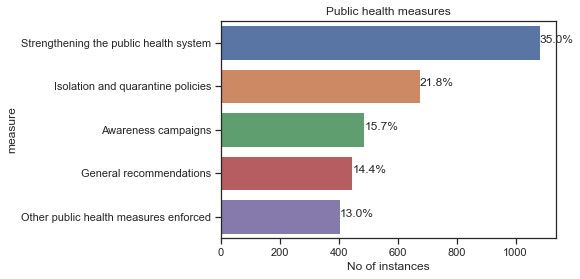

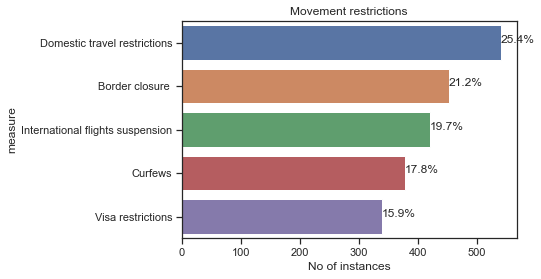

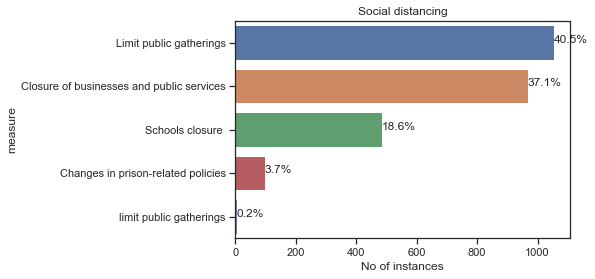

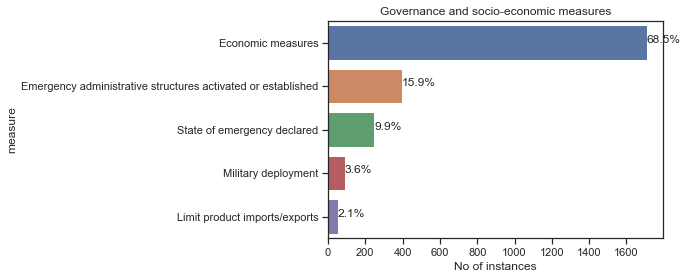

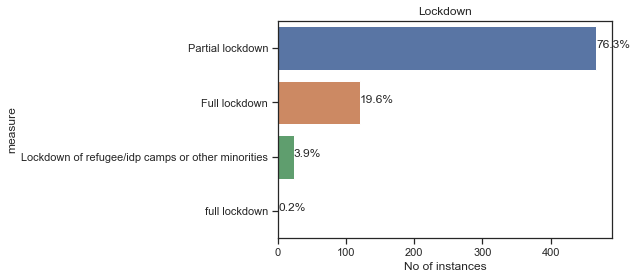

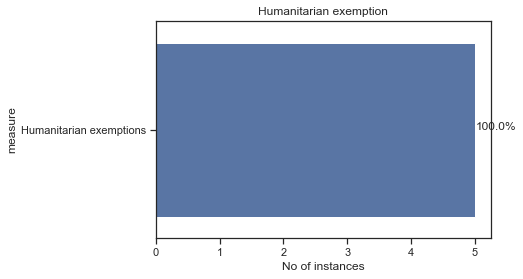

In [95]:
for i in category['index']:
    healthcare = data[data['category']==i]
    healthcare = healthcare['measure'].value_counts()
    healthcare = healthcare[:5]
    healthcare = pd.DataFrame(healthcare)
    healthcare.reset_index(inplace = True)
    healthcare.columns = ['measure', 'count']
    ax = sns.barplot(x = 'count', y = 'measure', data = healthcare)
    plt.title(i)
    plt.xlabel('No of instances')
    
    total = sum(healthcare['count'])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100*p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
    plt.show()

In [96]:
#Economic measures has been the highest used measure in all of the categories at 1700+ instances.

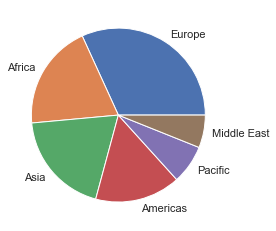

In [97]:
region = data['region'].value_counts()

plt.pie(region, labels = region.index)
plt.show()

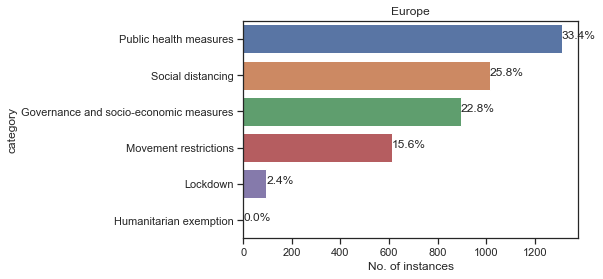

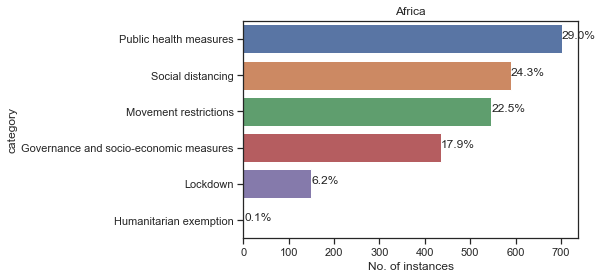

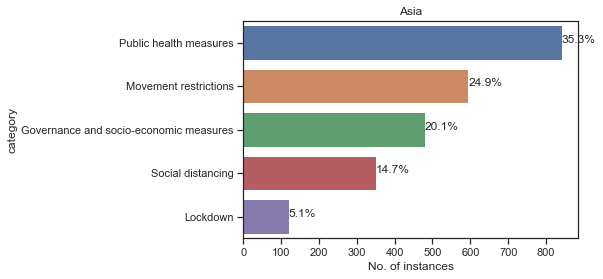

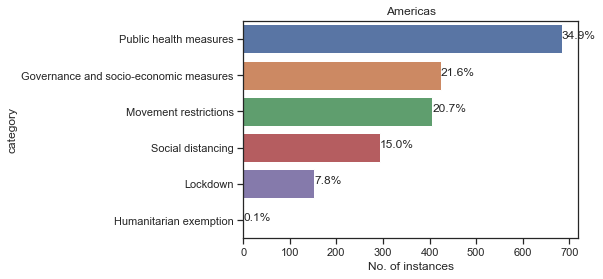

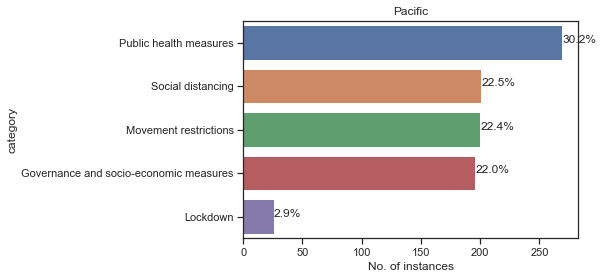

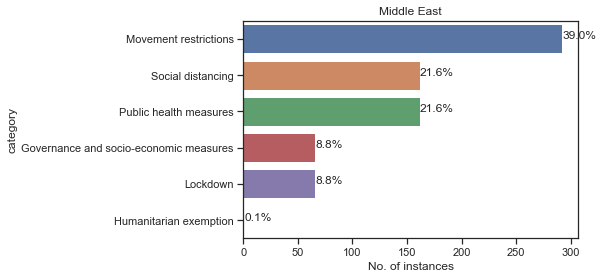

In [98]:
for i in region.index:
    loc = data[data['region']==i]
    loc = loc['category'].value_counts()
#loc = loc[:]
    loc = pd.DataFrame(loc)
    loc.reset_index(inplace = True)
    loc.columns = ['category', 'count']
    ax = sns.barplot(x = 'count', y = 'category', data = loc)
    plt.title(i)
    plt.xlabel('No. of instances')
    
    total = sum(loc['count'])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100*p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

    plt.show()
    

In [99]:
#Middle East has minimun Public Health and Gov & Socio-Economic Measures and highest Lockdown and Movement Restrictions
#Americas has the least social distancing
#Europe has the highest Gov & Socio-Economic Measures and Least Lockdown
#Pacific has the second least Lockdown
#Asia has highest Public Health Measures
